<a href="https://colab.research.google.com/github/monya-9/deep-learning-experiments/blob/main/12_Accuracy_vs_F1_class_imbalance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# class imbalance 상황에서 accuracy vs F1의 차이

## 1. 실험 목적
- 클래스 불균형 상황에서 Accuracy와 F1-score의 차이를 확인

- Accuracy만으로 모델 성능을 평가했을 때 나타날 수 있는 오해를 확인

- 불균형 문제에서 F1-score가 왜 중요한지 이해


## 2. 실험 설계

- 데이터: 인위적 이진 분류 데이터 생성 (make_classification)

- 클래스 비율: 0 → 90%, 1 → 10%

- 1,000개 샘플, 10개 피처

- 모델: Logistic Regression

- 평가 지표: Accuracy, F1-score (macro/micro 생략, 단순 F1)

- 시각화: Accuracy와 F1-score 비교를 막대 그래프로 표현

In [1]:
# =======================
# 0. 라이브러리 설치
# =======================
!pip install -q scikit-learn matplotlib

In [2]:
# =======================
# 1. 라이브러리
# =======================
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

In [3]:
# =======================
# 2. 불균형 데이터 생성
# =======================
X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=5,
    n_redundant=0,
    n_clusters_per_class=1,
    weights=[0.9, 0.1],  # 클래스 0:90%, 클래스 1:10%
    flip_y=0,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Train class distribution: {np.bincount(y_train)}")
print(f"Test class distribution: {np.bincount(y_test)}")

Train class distribution: [629  71]
Test class distribution: [271  29]


- 총 1000개의 샘플, 10개의 피처 생성

- 클래스 비율: 0 → 90%, 1 → 10% (불균형)

- train_test_split으로 학습용 70%, 평가용 30% 분리

- random_state 고정 → 재현성 보장

In [4]:
# =======================
# 3. 모델 학습
# =======================
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

- Logistic Regression 모델 생성 후 학습

- 학습된 모델로 테스트 데이터 예측 (y_pred)

In [5]:
# =======================
# 4. 평가
# =======================
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")
print(f"F1-score: {f1:.4f}")


Accuracy: 0.9967
F1-score: 0.9825


- Accuracy: 전체 샘플 중 맞춘 비율

- F1-score: Positive 클래스 예측 성능 반영

- 불균형 상황에서 Accuracy가 높아도 F1 낮을 수 있음

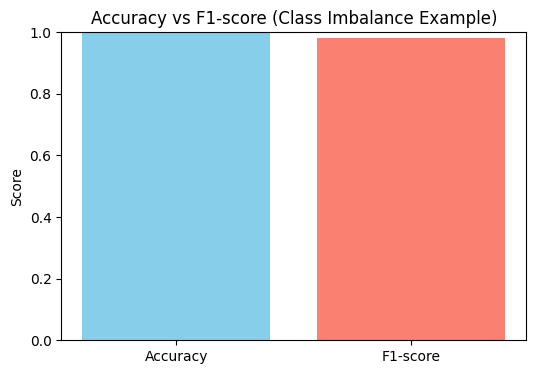

In [6]:
# =======================
# 5. 시각화
# =======================
plt.figure(figsize=(6,4))
plt.bar(["Accuracy", "F1-score"], [acc, f1], color=["skyblue","salmon"])
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Accuracy vs F1-score (Class Imbalance Example)")
plt.show()

- 막대 그래프로 Accuracy와 F1-score 비교

- 시각적으로 클래스 불균형 영향 확인 가능

## ✅ 결과 및 요약
| Metric   | Score  |
| -------- | ------ |
| Accuracy | 0.9967 |
| F1-score | 0.9825 |


- 단순 Accuracy만 보는 것보다 F1-score 확인이 중요

- 이번 실험에서는 두 지표가 모두 높아 모델 성능이 안정적임을 확인

- 실무에서는 클래스 불균형 문제를 고려할 때, 항상 Accuracy와 F1-score를 함께 평가하는 것이 권장됨